In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prishasawhney/mushroom-dataset")

dataset = pd.read_csv(f"{path}/{os.listdir(path)[0]}")
dataset.head()

/home/parth/miniconda3/envs/env-practice-ml-py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


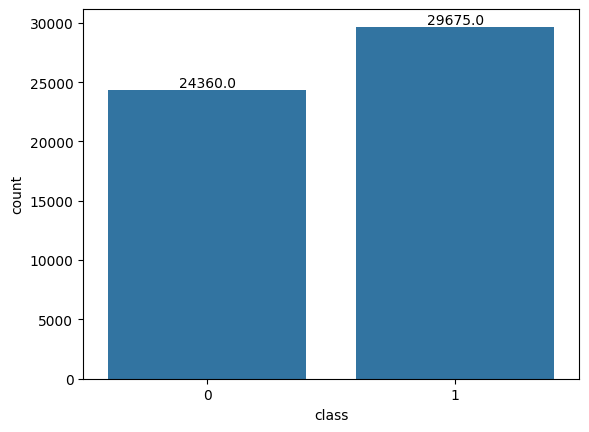

In [3]:
import seaborn as sns

ax = sns.countplot(x="class", data=dataset)
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(p.get_height(), (x, y), ha="center", va="bottom")

In [4]:
dataset.isna().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [5]:
dataset.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [6]:
from sklearn.preprocessing import StandardScaler

normalize_columns = ["cap-diameter", "stem-width"]
scaler = StandardScaler()
dataset[normalize_columns] = scaler.fit_transform(dataset[normalize_columns])

dataset.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,2.236139,2,2,10,3.807467,0.631570,11,1.804273,1
1,2.483444,2,2,10,3.807467,0.646914,11,1.804273,1
2,2.233361,2,2,10,3.612496,0.658423,11,1.804273,1
3,1.927704,6,2,10,3.787572,0.658423,11,1.804273,1
4,2.049966,6,2,10,3.711971,0.527996,11,0.943195,1


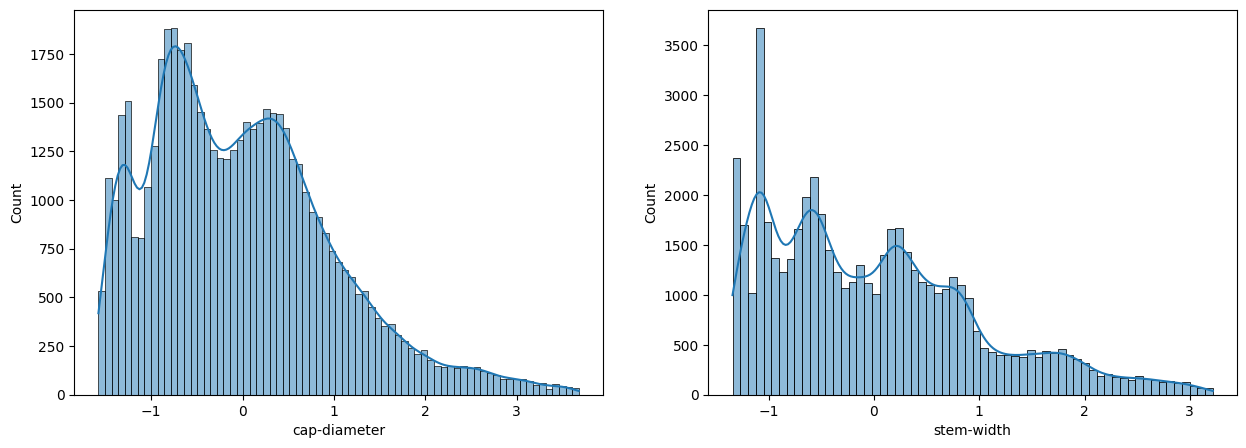

In [7]:
from matplotlib import pyplot as plt

_, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=100)

for i, column in enumerate(normalize_columns):
    sns.histplot(dataset[column], kde=True, ax=axes[i])

In [8]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=["class"], axis=1, inplace=False)
y = dataset[["class"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42
)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(
    n_neighbors=2, weights="distance",
    algorithm="auto"
)
knc.fit(X_train, y_train)

/home/parth/miniconda3/envs/env-practice-ml-py310/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2, weights='distance')

In [10]:
knc.score(X_test, y_test)

0.9880632923105395

In [11]:
from sklearn.metrics import balanced_accuracy_score

y_pred = knc.predict(X_test)
print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred) * 100:.4f}")

Balanced Accuracy: 98.7790


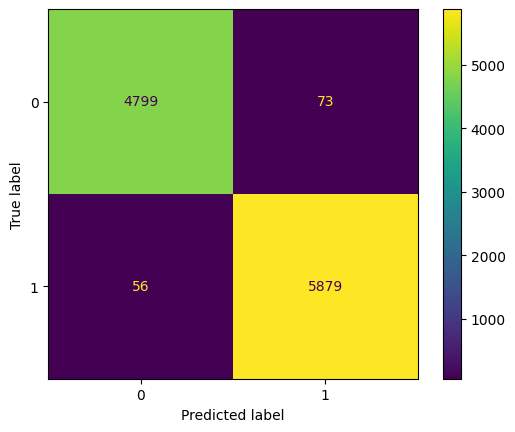

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred)
).plot()

In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4872
           1       0.99      0.99      0.99      5935

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807

